<a href="https://colab.research.google.com/github/romanaahmed23/data-analytics/blob/main/Unit_3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode()
cf.go_offline()

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
    <script>
        requirejs.config({
          paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
          },
        });
    </script>
  '''))

In [ ]:
import plotly.express as px

Task 2: Data Collection

In [ ]:
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
covid_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2109122,2022-01-12,Sweetwater,Wyoming,56037.0,8674,112.0
2109123,2022-01-12,Teton,Wyoming,56039.0,7658,14.0
2109124,2022-01-12,Uinta,Wyoming,56041.0,4422,34.0
2109125,2022-01-12,Washakie,Wyoming,56043.0,1946,41.0


In [ ]:
new_covid_df = covid_df[covid_df['county'] == 'New York City']
new_covid_df

In [ ]:
#covid cases last 30 days
thirty_days_count = new_covid_df.sort_values('date', ascending = True).head(29)
thirty_days_count

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
565,2020-03-05,New York City,New York,NaN,4,0.0
627,2020-03-06,New York City,New York,NaN,5,0.0
715,2020-03-07,New York City,New York,NaN,12,0.0
820,2020-03-08,New York City,New York,NaN,14,0.0
947,2020-03-09,New York City,New York,NaN,20,0.0
1098,2020-03-10,New York City,New York,NaN,37,0.0


In [ ]:
new_cases = thirty_days_count['cases'].max() - thirty_days_count['cases'].min()

In [ ]:
new_deaths = thirty_days_count['deaths'].max() - thirty_days_count['deaths'].min()
new_deaths = int(new_deaths)

In [ ]:
print("As of last 30 days in NYC new Covid-19 cases are " + 
      str(new_cases) + " and deaths are " + str(new_deaths) + ".")

As of last 30 days in NYC new Covid-19 cases are 33982 and deaths are 991.


Task 3: Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
thirty_days_count['date'].is_unique

True

In [ ]:
thirty_days_count['date'].isnull()

2107753    False
2104502    False
2101251    False
2098000    False
2094748    False
2091496    False
2088245    False
2084993    False
2081741    False
2078489    False
2075238    False
2071987    False
2068736    False
2065485    False
2062235    False
2058986    False
2055737    False
2052487    False
2049237    False
2045987    False
2042737    False
2039488    False
2036238    False
2032988    False
2029738    False
2026487    False
2023236    False
2019985    False
2016734    False
Name: date, dtype: bool

In [ ]:
thirty_days_count['fips'].isnull()

2107753    True
2104502    True
2101251    True
2098000    True
2094748    True
2091496    True
2088245    True
2084993    True
2081741    True
2078489    True
2075238    True
2071987    True
2068736    True
2065485    True
2062235    True
2058986    True
2055737    True
2052487    True
2049237    True
2045987    True
2042737    True
2039488    True
2036238    True
2032988    True
2029738    True
2026487    True
2023236    True
2019985    True
2016734    True
Name: fips, dtype: bool

In [ ]:
new_thirty_days = thirty_days_count.drop('fips', axis=1 )

In [ ]:
new_thirty_days.describe()

,cases,deaths
count,2.900000e+01,29.000000
mean,1.523763e+06,35390.724138
std,2.683150e+05,346.451388
min,1.201892e+06,35016.000000
25%,1.284470e+06,35126.000000
50%,1.463101e+06,35304.000000
75%,1.737167e+06,35605.000000
max,2.005338e+06,36224.000000


Task 4: Understanding Data

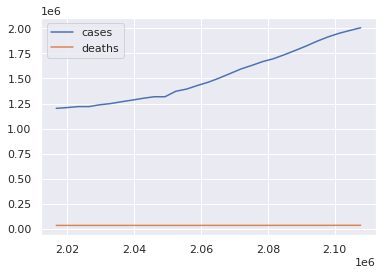

In [ ]:
new_thirty_days.plot() #this one looks good

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



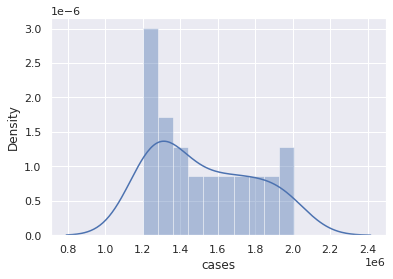

In [ ]:
sns.distplot(new_thirty_days['cases'], bins= 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



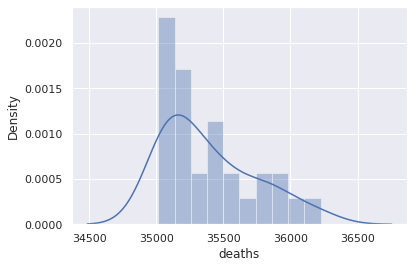

In [ ]:
sns.distplot(new_thirty_days['deaths'], bins= 10)

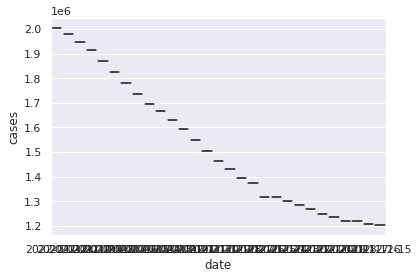

In [ ]:
sns.boxplot(x='date', y='cases', data=new_thirty_days)

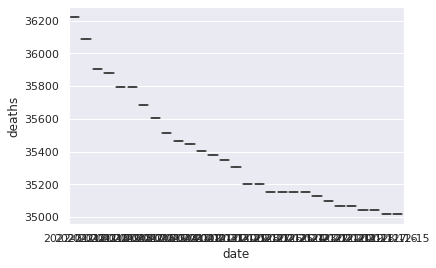

In [ ]:
sns.boxplot(x='date', y='deaths', data=new_thirty_days)

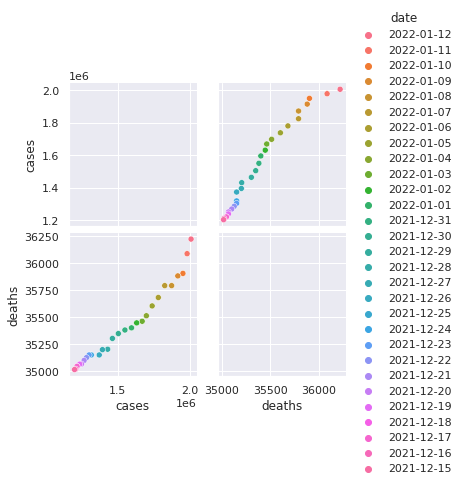

In [ ]:
sns.pairplot(new_thirty_days, hue='date') #this one looks good too

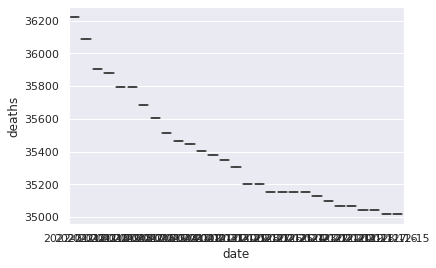

In [ ]:
sns.boxplot(x='date', y='deaths', data=new_thirty_days)

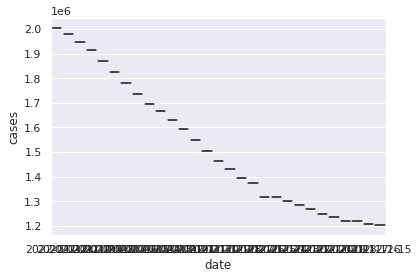

In [ ]:
sns.boxplot(x='date', y='cases', data=new_thirty_days)

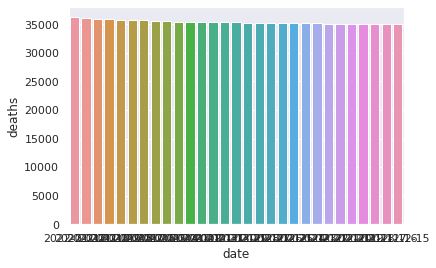

In [ ]:
sns.barplot(x='date', y='deaths', data=new_thirty_days)

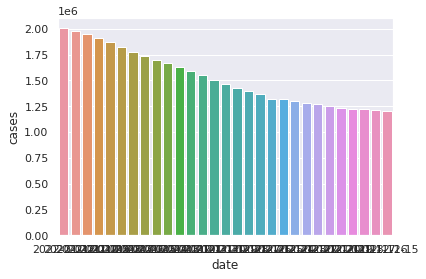

In [ ]:
sns.barplot(x='date', y='cases', data=new_thirty_days)

Task 5: Comparing Covid 19 Data With Another State

In [ ]:
washington_covid_df = covid_df[covid_df['state'] == 'Washington']

In [ ]:
washington_30_days = washington_covid_df.sort_values('date', ascending = False).head(29)
washington_30_days

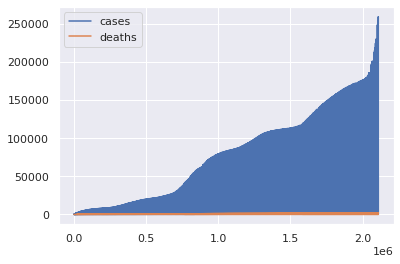

In [ ]:
new_washington_covid_df = washington_covid_df.drop('fips', axis=1)
new_washington_covid_df.plot()

In [ ]:
illinois_covid_df = covid_df[covid_df['state'] == 'Illinois']
illinois_30_days = illinois_covid_df.sort_values('date', ascending = False).head(29)
illinois_30_days

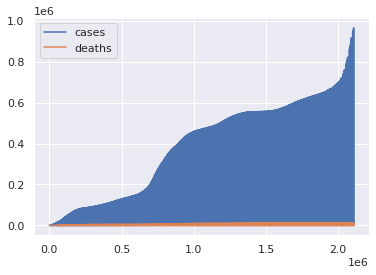

In [ ]:
new_illinois_covid_df = illinois_covid_df.drop('fips', axis=1)
new_illinois_covid_df.plot()

Task 6: Conclusion

* We can conclude that as of January 12, 2022 there were 2005338 cases and 36224 deaths in New York City.
* As of January 12, 2022 in Washington there were 32303 cases and	279 deaths.
* As of January 12, 2022 in Illinois there were 7853 cases and 115 deaths.
* Looking at the graphs of Washington and Illinois we can say that the cases and deaths both have increased over the time as the graph shows a steady rise. 
* There is a slight difference in the graph structure of the two states. In Illinois there was a surge in number of cases as the grpah rises in the middle compared to Washington. But near the end the cases in Illinois went down compared to Washington. But in the end it rose for both states.